<a href="https://colab.research.google.com/github/flowonthegoliv/ENVS666_2022/blob/main/Tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Computer Practical 2** 

OK, now we are going to step it up a little and bring in some slighltly more complex tools. These will help you analyse the data and make some more indepth intepretations. The aims of this practical will be to:

1. Introduce Correlations
2. Fourier Correlations 
3. In introduce the basics of LMS and regression.  
4. Introduce Principle Components Analysis


# Correlations
We will start with *correlations*. So first...what is a correlaton...let's take a look at a simple signal and I can show you...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
#synthetic data 
sine_wave = np.sin(np.arange(0,20*np.pi,np.pi/100));
cosine_wave = np.cos(np.arange(0,20*np.pi,np.pi/100));

Here we have created a sine wave and a cosine wave. What we can do now is to find how the correlate with one another. We know that a period of a sine wave is 2π so as we have told the computer to create 10 cycles. Let's plot them to see what they look like:

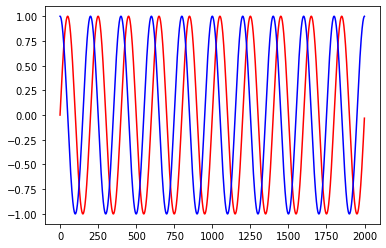

In [ ]:
plt.plot(sine_wave,'r')
plt.plot(cosine_wave,'b')

Here we can see that they two waves are separated by π we know this as that is what the defintion of sine and cosine. In our case here we have made π = 100 steps. So the correlation should tell us this:

In [ ]:
corr = np.correlate(sine_wave,cosine_wave,'full')

So now we could plot corr...and this might look a little strange...there is a complex mathematical reasoning behind this...but honestly...I don't want to go into it...well I might in the lecture!

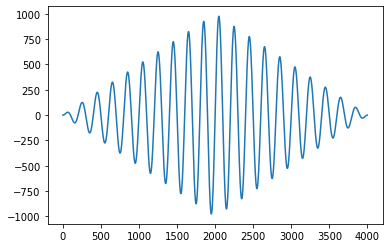

In [ ]:
plt.plot(corr)

We can see this nor creates a symmetrical version of correlation...looks pretty right!!! However, it now makes sense to clip this in two! 

In [ ]:
length_of_signal = np.size(corr,0)
print(length_of_signal)
half_of_signal = (1+length_of_signal)/2
print(half_of_signal)

3999
2000.0


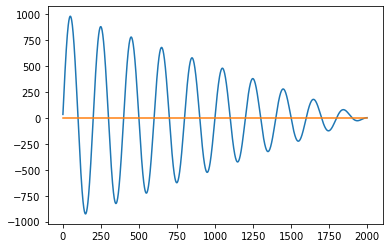

In [ ]:
plt.plot(corr[int(half_of_signal)::])
plt.plot([0,2000],[0,0])

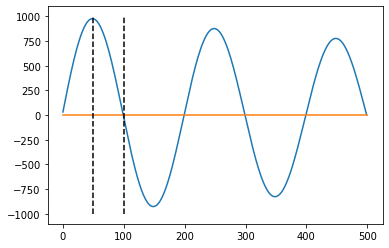

In [ ]:
plt.plot(corr[int(half_of_signal):int(half_of_signal)+500])
plt.plot([0,500],[0,0])
plt.plot([50,50],[-1000,1000],'k--')
plt.plot([100,100],[-1000,1000],'k--')

Quite clearly we can no see there from the first peak to he point in which the curve crosses the x-axis is they lag between the signals i.e. (50) the point at which the become the same. We can now prove this:


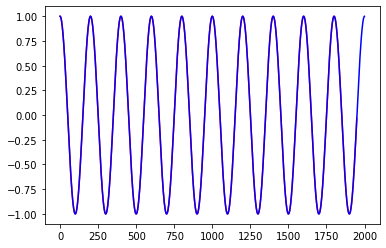

In [ ]:
plt.plot(sine_wave[50::],'r')
plt.plot(cosine_wave,'b')

# Fourier Power Spectra

OK, next we are going to look at something called a Fourier Power Spectra. What is this?! Well Fourier description told use that any single can be described by a set of superimposed sine waves:

 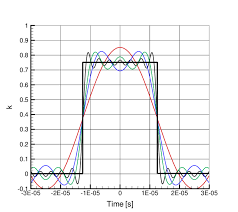

This means we should be able to determine any repetable patterns out out any signal...OK so lets look a this:

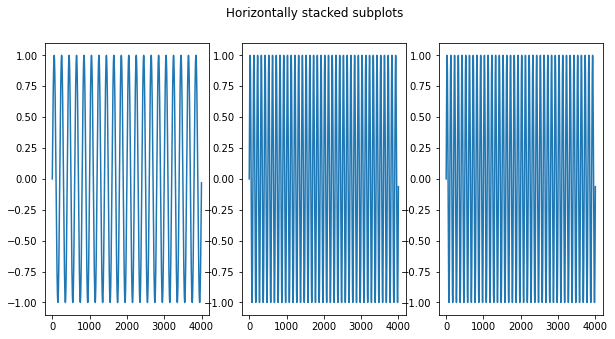

In [ ]:
#creating a fake signal 

sine_wave_1 = np.sin(np.arange(0,40*np.pi,np.pi/100));
sine_wave_2 = np.sin(np.arange(0,80*np.pi,np.pi/50));
sine_wave_3 = np.sin(np.arange(0,160*np.pi,np.pi/25));
comb = sine_wave_1+sine_wave_2+sine_wave_3

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(10, 5)) # here we define we can have a 2 colums and 1 rows plots

fig.suptitle('Horizontally stacked subplots')
ax1.plot(sine_wave_1)
ax2.plot(sine_wave_2)
ax3.plot(sine_wave_2)


(0.0, 1000.0)

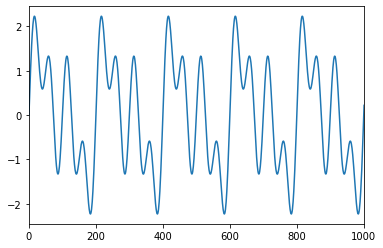

In [ ]:
# Just plotting the combination of the sine waves
plt.plot(comb)
plt.xlim(0,1000)

So we can now see how we can get the orignal signals out from ths signal. We can does ths with a pwelch fourier transform. There is a full paper about what this does...written by P Welch...but I wouldn't worry too much about it! 

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 4096 is greater than input length  = 4000, using nperseg = 4000
  .format(nperseg, input_length))


Text(0, 0.5, 'var')

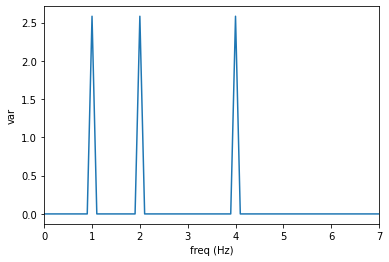

In [ ]:
from scipy import signal

x = comb
fs = 200 #our frequency x 2 (Nyquist-Shannon theory)

fxx, pxx = signal.welch(x,fs,nperseg=4096)

# we now sqrt as this is a measure of variance i.e. something squared! 
plt.plot(fxx,np.sqrt(pxx))
plt.xlim([0,7])
plt.xlabel('freq (Hz)')
plt.ylabel('var')


Here we can now see it is possible to determine the inner frequencies. Maybe we can even do something to determine how strong the signal is. 

(0.0, 1000.0)

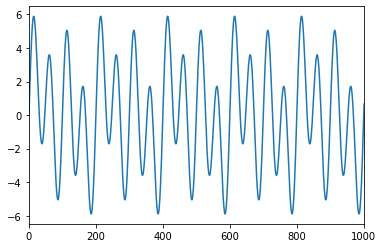

In [ ]:
#creating a fake signal 
sine_wave_1 = np.sin(np.arange(0,40*np.pi,np.pi/100));
sine_wave_2 = 2*np.sin(np.arange(0,80*np.pi,np.pi/50));
sine_wave_3 = 4*np.sin(np.arange(0,160*np.pi,np.pi/25));
comb = sine_wave_1+sine_wave_2+sine_wave_3
plt.plot(comb)
plt.xlim(0,1000)

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 4096 is greater than input length  = 4000, using nperseg = 4000
  .format(nperseg, input_length))


(0.0, 7.0)

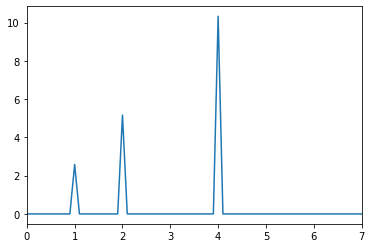

In [ ]:
x = comb
fs = 200 #our frequency x 2 (Nyquist-Shannon theory)
fxx, pxx = signal.welch(x,fs,nperseg=4096)
plt.plot(fxx,np.sqrt(pxx)) # sqrt the vals for difference 
plt.xlim([0,7])


Wow...so now we actually have a model of the data...this would mean the biggest underlying signals can be picked our of a signal...

# Regression 

So we are now going to look at regression. Here I am going to simplfy this a little bit and just look at a least means squares fit. This takes us back to our high-school days and:

y = mx + c 

What does this mean? Well the **m** here describes the gradient of the line and the **c** the point at which it crosses the x-axis. Well..why is this important...we actually this forms the basis of any linear system...or linear model. If we can take data and consende it into a simple equation this means we have create a model. OK let's have an example. 




Text(0, 0.5, 'y')

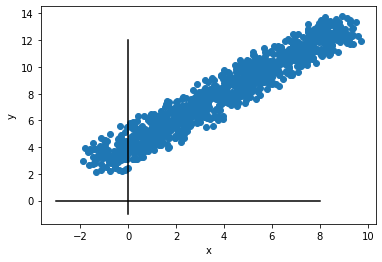

In [ ]:
#create some scattered data. 
import numpy as np 
import matplotlib.pyplot as plt 

# some random data 
x = np.arange(0,10,0.01)+2*np.random.rand(1,1000)-2
y = 2+np.arange(0,10,0.01)+2*np.random.rand(1,1000)

plt.scatter(x,y)
plt.plot([-3,8],[0,0],'k')
plt.plot([0,0],[-1,12],'k')
plt.xlabel('x')
plt.ylabel('y')

So...how can we describe these data...well we can get a fit...this is called a least means squares fit...if your interested...well...I have a youtube video explaining how it works! OK so lets try and fit between -2 and 8 

In [ ]:
fit = np.polyfit(np.ravel(x),np.ravel(y),1)
# OK we need to use the ravel function...but that is because python is annoying! 
print(fit)

[0.96978246 4.16161048]


We now have two numbers...these are the numbers which make up:

y = mx + c

So if we simulate x

In [ ]:
xs = np.arange(-2,10,1)
print(xs)
ys = fit[0]*xs + fit[1] #our y = mx + c

[-2 -1  0  1  2  3  4  5  6  7  8  9]


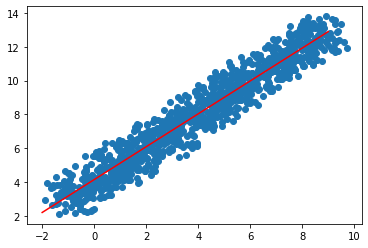

In [ ]:
plt.scatter(x,y);
plt.plot(xs,ys,'r')

So whoop whoop...we can now describe all of these data with just two numbers...we can even now model...maybe we project a little further into the future...

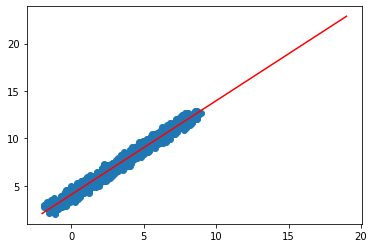

In [ ]:
xs = np.arange(-2,20,1) # changing the value to 20 
ys = fit[0]*xs + fit[1] #our y = mx + c
plt.scatter(x,y);
plt.plot(xs,ys,'r')

# Applying to Real Data

Ok so no we will apply this to some real data...for this we need to bring back the reader from last week

In [ ]:
filename = 'data/sample_data/sample_no2.csv' # here we can read in the DEFRA data

# this reads in the data and tidies it up. Don't worry if you don't understand it! 
import pandas as pd
import datetime
url = f'https://raw.githubusercontent.com/flowonthegoliv/ENVS666/main/{filename}'
df = pd.read_csv(url, skiprows=3,dtype='unicode')
df = df.drop(df.columns[range(3,df.shape[1],2)],axis=1)
df = df.drop([0,df.shape[0]-1],axis=0)
for i in range(1,df.shape[0]+1):
  time = df[df.columns[1]][i]
  tmp = "%0.2d" % (np.uint8(time[0:2])-1)
  df[df.columns[1]][i] = tmp+time[2::]
df[df.columns[1]] = pd.to_datetime(df[df.columns[0]] + ' ' + df[df.columns[1]])
df = df.drop(df.columns[0],axis=1)
df = df.rename({df.columns[0]: 'Date & Time'},axis=1)
df = df.replace(['No data'],'9999')
df = df[df.columns[range(0,df.shape[1])]].apply(pd.to_numeric)
df[df.columns[0]] = pd.to_datetime(df[df.columns[0]]);
df = df.replace([9999],np.nan)

# this finished the complex bit - again don't worry I am just tidying 

,Date & Time,Aberdeen,Aberdeen Union Street Roadside,Aberdeen Wellington Road,Armagh Roadside,Aston Hill,Auchencorth Moss,Ballymena Antrim Road,Ballymena Ballykeel,Barnsley Gawber,Bath A4 Roadside,Belfast Centre,Belfast Stockman's Lane,Billingham,Birkenhead Borough Road,Birmingham A4540 Roadside,Birmingham Acocks Green,Birmingham Ladywood,Blackburn Accrington Road,Blackpool Marton,Borehamwood Meadow Park,Bournemouth,Bradford Mayo Avenue,Brighton Preston Park,Bristol St Paul's,Bristol Temple Way,Burton-on-Trent Horninglow,Bury Whitefield Roadside,Bush Estate,Cambridge Roadside,Camden Kerbside,Cannock A5190 Roadside,Canterbury,Cardiff Centre,Cardiff Newport Road,Carlisle Roadside,Charlton Mackrell,Chatham Roadside,Chepstow A48,Chesterfield Loundsley Green,...,Salford Eccles,Sandy Roadside,Scunthorpe Town,Shaw Crompton Way,Sheffield Barnsley Road,Sheffield Devonshire Green,Sheffield Tinsley,Sibton,Southampton A33,Southampton Centre,Southend-on-Sea,Southwark A2 Old Kent Road,St Helens Linkway,St Osyth,Stanford-le-Hope Roadside,Stockton-on-Tees A1305 Roadside,Stockton-on-Tees Eaglescliffe,Stoke-on-Trent A50 Roadside,Stoke-on-Trent Centre,Storrington Roadside,Strathvaich,Sunderland Silksworth,Sunderland Wessington Way,Swansea Roadside,Swindon Walcot,Telford Hollinswood,Thurrock,Tower Hamlets Roadside,Walsall Woodlands,Warrington,West Bromwich Kenrick Park,Wicken Fen,Widnes Milton Road,Wigan Centre,Wirral Tranmere,Worthing A27 Roadside,Wrexham,Yarner Wood,York Bootham,York Fishergate
1,2020-02-15 00:00:00,1.10809,10.68806,2.72801,6.02156,0.25209,NaN,2.61205,0.50699,0.74692,5.90505,NaN,16.63134,0.54327,3.78170,11.58530,0.84132,NaN,4.11526,0.21308,0.37012,0.09909,10.77686,0.27130,0.62427,25.30295,0.98252,0.73166,0.37477,7.24615,7.81020,4.35445,0.93681,1.86471,4.38373,1.39739,0.45828,3.36707,6.82772,0.38894,...,1.50750,2.05251,1.12476,4.91633,11.63678,7.96425,0.27677,NaN,1.82182,1.43396,0.21033,1.40849,NaN,0.04201,NaN,0.71559,0.52028,22.61830,3.49680,0.60909,NaN,0.60317,2.68095,2.75937,0.54632,0.77567,2.20741,2.42688,1.04449,1.97401,0.66445,0.37417,4.34593,1.18356,0.42077,2.98287,8.03366,0.31299,0.23247,6.81154
2,2020-02-15 01:00:00,0.53726,5.19134,1.44820,2.24251,0.30251,NaN,2.24545,0.53113,NaN,2.73053,NaN,NaN,0.69143,2.83627,8.26873,1.54242,0.24910,1.72169,0.29832,NaN,0.37160,12.79752,0.31652,0.70751,7.62008,1.07610,1.85066,NaN,14.12070,6.55555,0.77322,1.19704,NaN,0.24131,1.90553,0.33329,1.32911,3.26543,0.34032,...,1.28580,3.10264,0.79150,10.61927,31.33722,22.61603,0.64581,NaN,2.08843,1.56048,0.16826,1.27644,7.52819,NaN,NaN,0.82083,0.63590,8.45504,1.62352,0.60909,NaN,0.35185,2.21061,2.10461,0.75645,1.14069,0.95974,0.39003,1.13945,0.72952,0.99667,0.37417,2.43904,0.33816,0.46752,1.98858,1.33894,0.26828,0.30995,3.12731
3,2020-02-15 02:00:00,0.60441,6.19471,0.77462,1.02782,0.30251,NaN,1.71846,0.76048,0.46683,2.33094,NaN,33.23778,0.48153,2.83627,6.20154,0.99907,0.15569,0.75586,0.28766,0.09253,0.14864,8.28471,0.30521,0.56184,10.24769,1.01761,0.96837,0.40600,7.00229,4.86177,0.85461,0.97585,NaN,0.48261,0.63518,0.62492,1.62815,4.89815,0.43755,...,1.09737,2.79238,0.37492,1.99931,16.62225,39.73764,1.00330,NaN,1.66630,1.04384,0.25239,0.82528,6.41172,0.06302,0.33751,0.72612,0.52028,5.95501,1.46741,0.68523,NaN,0.30159,1.65796,0.91200,0.50430,0.92396,0.57585,0.65006,0.89019,0.54714,0.68521,0.43653,3.45901,0.28532,0.42077,1.24286,1.79323,0.20121,0.29058,2.21697
4,2020-02-15 03:00:00,0.67157,2.44299,1.41452,1.33928,0.41595,NaN,0.92797,0.68805,0.28010,4.19569,NaN,6.64756,0.62970,1.20233,2.38521,0.78874,0.28024,0.62989,0.31962,0.21590,0.29728,14.54876,0.37304,0.40578,1.54737,0.63162,2.13041,0.34354,5.01656,4.48538,1.00722,0.93681,NaN,0.42229,1.04804,0.21872,1.82752,0.95419,0.21878,...,0.63182,1.39619,0.28119,1.90098,11.84199,11.23962,0.55355,NaN,2.23284,0.69589,0.25239,0.62722,4.30638,0.00000,0.53038,0.72612,0.47692,4.86057,1.18642,1.05068,NaN,0.37698,3.70395,1.29784,0.44126,0.54753,1.00773,0.74757,0.53412,0.45059,0.43604,0.37417,0.79823,0.25362,0.38571

In [ ]:
#Here we will randomly select a place 
time = df['Date & Time'].array # here we read the date and time
data1 = df['Belfast Centre'].array.to_numpy() # we can choose any place based on the location you can see we use .array.to_numpy() to make this into a set of numbers
data2 = df['Glasgow High Street'].array.to_numpy() # we can choose any place based on the location you can see we use .array.to_numpy() to make this into a set of numbers

OK so let's start with the correlation (auto-correlation) correlating with itself...




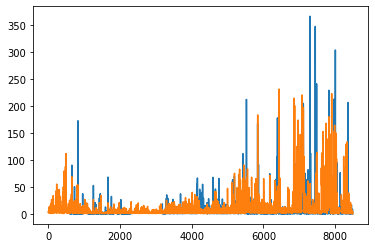

In [ ]:
plt.plot(data1)
plt.plot(data2)

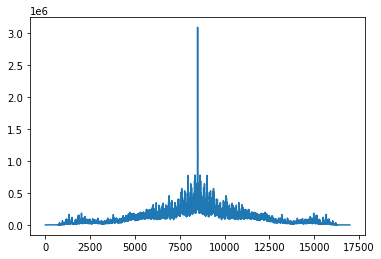

In [ ]:
data1[np.isnan(data1)]=0
data2[np.isnan(data2)]=0 
#fills in the missing value with a zero.

corr = np.correlate(data1,data1,'full')
plt.plot(corr)

In [ ]:
length_of_signal = np.size(corr,0)
print(length_of_signal)
half_of_signal = (1+length_of_signal)/2
print(half_of_signal)

16991
8496.0


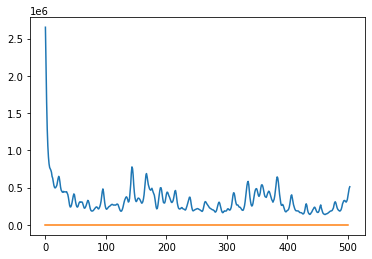

In [ ]:
plt.plot(corr[8496:9000])
plt.plot([0,500],[0,0])
plt.plot([50,50],[-1000,1000],'k--')
plt.plot([100,100],[-1000,1000],'k--')

Not found a correlation with the orginal data...

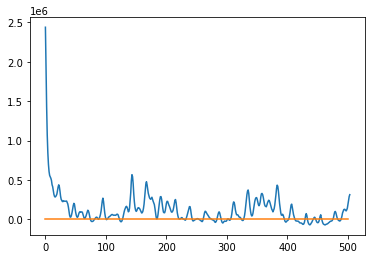

In [ ]:
corr = np.correlate(data1-np.mean(data1),data1-np.mean(data1),'full')
plt.plot(corr[8496:9000])
plt.plot([0,500],[0,0])
plt.plot([50,50],[-1000,1000],'k--')
plt.plot([100,100],[-1000,1000],'k--')

let's try a cross-correlation (x-corr) 

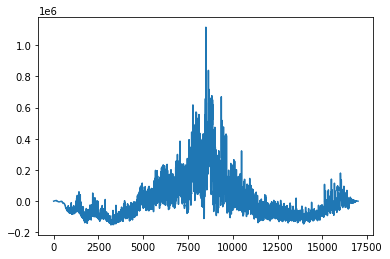

In [ ]:
data1[np.isnan(data1)]=0
data2[np.isnan(data2)]=0 
#fills in the missing value with a zero.
corr = np.correlate(data1-np.mean(data1),data2-np.mean(data2),'full')
plt.plot(corr)

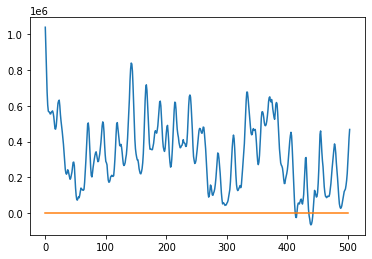

In [ ]:
plt.plot(corr[8496:9000])
plt.plot([0,500],[0,0])
plt.plot([50,50],[-1000,1000],'k--')
plt.plot([100,100],[-1000,1000],'k--')

In [ ]:
(400/24)*2

array([1114706.10279606])

# Fourier
Let's try fourier ps 

(0.0, 10.0)

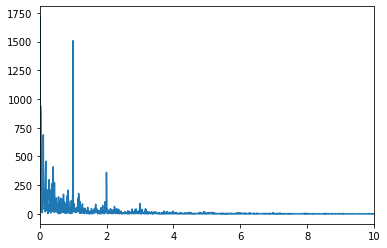

In [ ]:
# just looking at one data set now 

fs = 24;
fxx, pxx = signal.welch(data2,fs,nperseg=4096)

plt.plot(fxx,pxx)
plt.xlim([0,10])

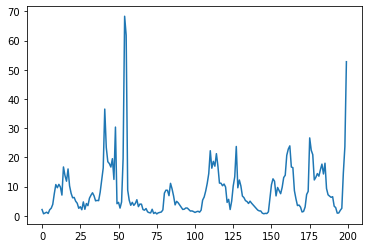

In [ ]:
plt.plot(data2[600:800])

# Regression 
So let's look for some trends

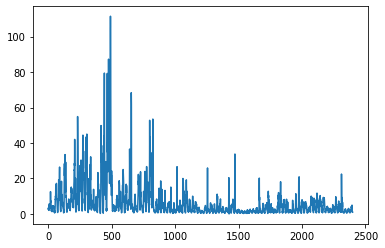

In [ ]:
y = data2[0:24*100]
x = np.arange(0,2400)

plt.plot(x,y)



[-5.09893047e-03  1.23430974e+01]


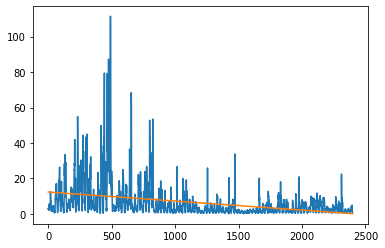

In [ ]:
fit = np.polyfit(np.ravel(x),np.ravel(y),1)
# OK we need to use the ravel function...but that is because python is annoying! 
print(fit)

ys = fit[0]*x + fit[1] #our y = mx + c

plt.plot(x,y)
plt.plot(ys)

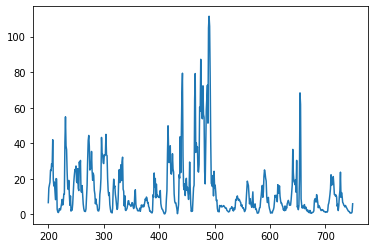

In [ ]:
plt.plot(x[200:750],y[200:750])

x1 = x[200:750]
y1 = y[200:750]

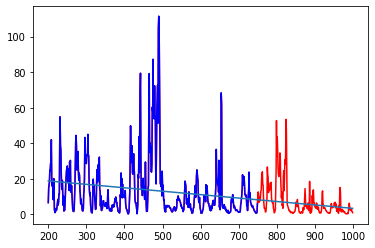

In [ ]:
fit1 = np.polyfit(np.ravel(x1),np.ravel(y1),1)
ys1 = fit1[0]*x1 + fit1[1] #our y = mx + c

xs1 = np.arange(200,1000) 

ys1 = fit1[0]*xs1 + fit1[1] #our y = mx + c


x2 = x[200:1000]
y2 = y[200:1000]

plt.plot(x2,y2,'r')
plt.plot(x1,y1,'b')


plt.plot(xs1,ys1,)

